In [1]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

from scipy.ndimage.interpolation import zoom
from pydicom import dcmread

In [146]:
eot_dir = r'N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\ff'
nii_output = r'N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\ff'

In [147]:
patient_folders = os.listdir(eot_dir)
print(patient_folders), len(patient_folders)

['c_9122']


(None, 1)

In [150]:
#patient_id = 'f_2423'
patient_id = patient_folders[0]

folder_path = os.path.join(eot_dir, patient_id)

print(folder_path)

dcm_list = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".dcm"):
            dcm_list.append(os.path.join(root, file))
            
data = {}
data['mag5_dcm_path'] = []
data['slice_location'] = []

for i in dcm_list:
    dcm = dcmread(i)
    data['mag5_dcm_path'].append(i)
    data['slice_location'].append(dcm.SliceLocation)

data = pd.DataFrame.from_dict(data)

print(data.to_string())

N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\ff\c_9122
                                                                                                     mag5_dcm_path  slice_location
0   N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\ff\c_9122\FFLQ_HIGH_9007\IM-0003-0001.dcm      204.341217
1   N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\ff\c_9122\FFLQ_HIGH_9007\IM-0003-0002.dcm      194.341217
2   N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\ff\c_9122\FFLQ_HIGH_9007\IM-0003-0003.dcm      184.341217
3   N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\ff\c_9122\FFLQ_HIGH_9007\IM-0003-0004.dcm      174.341217
4   N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\ff\c_9122\FFLQ_HIGH_9007\IM-0003-0005.dcm      164.341217
5   N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\ff\c_9122\FFLQ_HIGH_9007\IM-0003-0006.dcm      154.341217
6   

In [134]:
high = list(data['slice_location'][0:8])
sorted(high)

[179.92549324036,
 189.92549419403,
 199.9254937917,
 209.92549419403,
 219.92549324036,
 229.92549324036,
 239.92549514771,
 249.92549514771]

In [136]:
midhigh = list(data['slice_location'][12:16])
sorted(midhigh)

[139.97391891479, 149.97391891479, 159.97391891479, 169.97392082214]

In [92]:
midlow = list(data['slice_location'][20:27])
sorted(midlow)

[-77.0, -67.0, -57.0, -47.0, -37.0, -27.0, -17.0]

In [138]:
low = list(data['slice_location'][19:])
sorted(low)

[95.179733276367,
 105.17973327637,
 115.17973327637,
 125.17973327637,
 135.17973327637]

In [152]:
# VERIFY CORRECT SLICE LOCATIONS

high = list(data['slice_location'][:15])
#midhigh = list(data['slice_location'][12:16])
#midlow = list(data['slice_location'][20:27])
low = list(data['slice_location'][17:])

series = sorted(high + low )
series, print(len(series))

28


([-65.07312775,
  -55.07312775,
  -45.07312775,
  -35.07312775,
  -25.07312775,
  -15.07312775,
  -5.073127747,
  4.926872253,
  14.92687225,
  24.92687225,
  34.92687225,
  44.92687225,
  54.92687225,
  64.34121704,
  74.34121704,
  84.34121704,
  94.34121704,
  104.341217,
  114.341217,
  124.341217,
  134.341217,
  144.341217,
  154.341217,
  164.341217,
  174.341217,
  184.341217,
  194.341217,
  204.341217],
 None)

In [167]:
high = data['mag5_dcm_path'][:15]
#midhigh = data['mag5_dcm_path'][12:16]
#midlow = data['mag5_dcm_path'][20:27]
low = data['mag5_dcm_path'][18:]

series = list(low.append(high))
#series = list(low.append(midlow).append(midhigh).append(high))
series, print(len(series))

27


(['N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0004.dcm',
  'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0005.dcm',
  'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0006.dcm',
  'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0007.dcm',
  'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0008.dcm',
  'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0009.dcm',
  'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0010.dcm',
  'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0011.dcm',
  'N:\\2_Analysi

In [169]:
dicoms1 = series[0:12]
dicoms2 = series[12:]

dicoms1, dicoms2

(['N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0004.dcm',
  'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0005.dcm',
  'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0006.dcm',
  'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0007.dcm',
  'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0008.dcm',
  'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0009.dcm',
  'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0010.dcm',
  'N:\\2_Analysis\\automated_analysis\\cynch_segmentations\\cynch_additions\\ff\\c_9122\\FFLQ_LOW_9010\\IM-0006-0011.dcm',
  'N:\\2_Analysi

In [170]:
# IF SERIES DON'T LINE UP AND NEED TO DO AXIAL REGISTRATION:

dicom_im1 = dcmread(dicoms1[0]).pixel_array
dicom_im2 = dcmread(dicoms2[0]).pixel_array

dicom_arr1 = np.zeros((dicom_im1.shape[0], dicom_im1.shape[1], len(dicoms1)))
dicom_arr2 = np.zeros((dicom_im2.shape[0], dicom_im2.shape[1], len(dicoms2)))

num = -1
for i in dicoms1:
    num += 1
    dicom = dcmread(i).pixel_array
    dicom_arr1[:,:,num] = dicom
    
num = -1
for i in dicoms2:
    num += 1
    dicom = dcmread(i).pixel_array
    dicom_arr2[:,:,num] = dicom


upper_dcm = dcmread(dicoms1[0])
lower_dcm = dcmread(dicoms2[0])

upper_x = upper_dcm.ImagePositionPatient[0]
lower_x = lower_dcm.ImagePositionPatient[0]

upper_y = upper_dcm.ImagePositionPatient[1]
lower_y = lower_dcm.ImagePositionPatient[1]

diff_x = -(upper_x - lower_x)
diff_y = -(upper_y - lower_y)

upper_ps = upper_dcm.PixelSpacing
lower_ps = lower_dcm.PixelSpacing

if upper_ps[0] == lower_ps[0]:
    pixel_spacing = upper_ps[0]
    print('pixel_spacing: ' + str(upper_ps[0]))
else:
    print('Different pixel spacing')
    
# Affine transofrmation
x_shift = round(diff_x / pixel_spacing)
y_shift = round(diff_y / pixel_spacing)

print('x_shift: ', str(x_shift))
print('y_shift: ', str(y_shift))

M = np.float32([
    [1, 0, x_shift],
    [0, 1, y_shift]
    ])

for i in range(dicom_arr2.shape[2]):
    img = dicom_arr2[:,:,i]
    
    shifted = cv2.warpAffine(img, M, (dicom_im2.shape[1], dicom_im2.shape[0]))
    
    dicom_arr2[:,:,i] = shifted
    
    
# IF NORMAL TOP TO BOTTOM
#combined = np.concatenate((dicom_arr1, dicom_arr2), axis = 2)

# IF REVERSED BOTTOM TO TOP
combined = np.concatenate((dicom_arr2, dicom_arr1), axis = 2)


combined.shape

pixel_spacing: 1.875
x_shift:  0
y_shift:  0


(256, 256, 27)

In [115]:
# Single shift a slice if it is off

shifted = cv2.warpAffine(combined[:,:,15], M, (192, 192))
combined[:,:,15] = shifted

<function matplotlib.pyplot.show(close=None, block=None)>

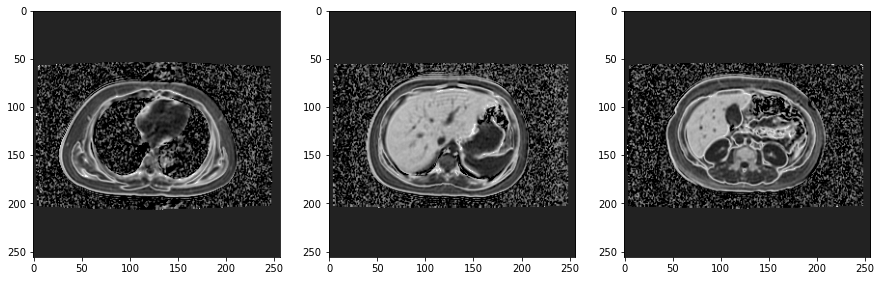

In [171]:
# CHECK IF REVERSED
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 3, 1)
plt.imshow(combined[:,:,0],cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(combined[:,:,8],cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(combined[:,:,16],cmap='gray')
plt.show

# BOTTOM OF LIVER SHOULD BE ON THE LEFT

(256, 256, 27)


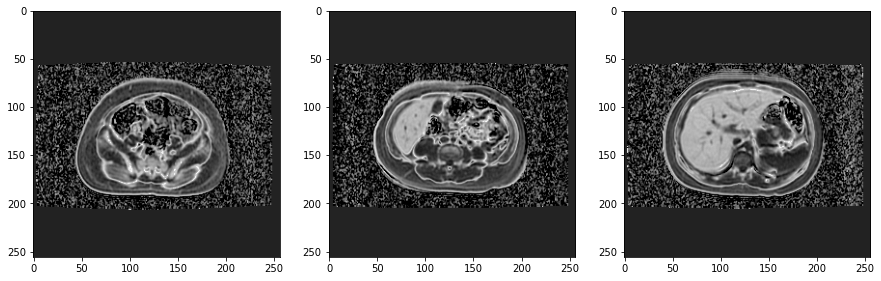

In [172]:
# IF REVERSED, RUN THIS
combined = combined[:,:,::-1]

# CHECK IT FIXED IT
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 3, 1)
plt.imshow(combined[:,:,0],cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(combined[:,:,8],cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(combined[:,:,16],cmap='gray')
plt.show
print(combined.shape)

In [173]:
# RESIZE IMAGE IF NEEDED
img_inter = cv2.resize(combined, (224, 224), interpolation = cv2.INTER_LINEAR)
img_inter.shape

(224, 224, 27)

In [174]:
print(patient_id + ' saved')
new_im = nib.Nifti1Image(np.flip(np.rot90(img_inter), 1), affine = np.eye(4))
print(new_im.shape)
nib.save(new_im, os.path.join(nii_output, patient_id))

c_9122 saved
(224, 224, 27)


In [141]:
# IF NORMAL

dicom_im = dcmread(series[0]).pixel_array

dicom_arr = np.zeros((dicom_im.shape[0], dicom_im.shape[1], len(series)))

num = -1
for i in series:
    num += 1
    dicom = dcmread(i).pixel_array
    dicom_arr[:,:,num] = dicom
    
dicom_arr.shape

(312, 384, 17)

<function matplotlib.pyplot.show(close=None, block=None)>

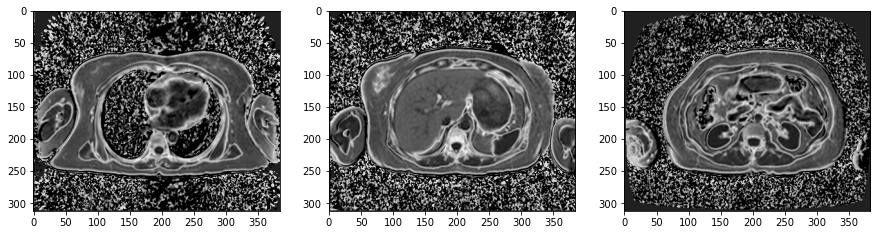

In [142]:
# CHECK IF REVERSED
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 3, 1)
plt.imshow(dicom_arr[:,:,0],cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(dicom_arr[:,:,8],cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(dicom_arr[:,:,16],cmap='gray')
plt.show

# BOTTOM OF LIVER SHOULD BE ON THE LEFT

(312, 384, 17)


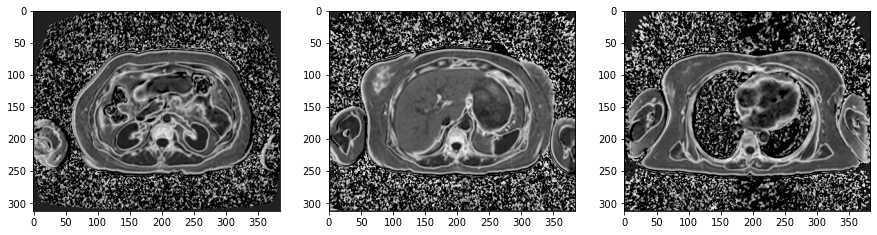

In [143]:
# IF REVERSED, RUN THIS
dicom_arr = dicom_arr[:,:,::-1]

# CHECK IT FIXED IT
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 3, 1)
plt.imshow(dicom_arr[:,:,1],cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(dicom_arr[:,:,8],cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(dicom_arr[:,:,16],cmap='gray')
plt.show
print(dicom_arr.shape)

In [144]:
# RESIZE IMAGE IF NEEDED
img_inter = cv2.resize(dicom_arr, (224, 224), interpolation = cv2.INTER_LINEAR)
img_inter.shape

(224, 224, 17)

In [145]:
print(patient_id + ' saved')
new_im = nib.Nifti1Image(np.flip(np.rot90(img_inter), 1), affine = np.eye(4))
print(new_im.shape)
nib.save(new_im, os.path.join(nii_output, patient_id))

f_8391 saved
(224, 224, 17)


In [68]:
data_table['Patient ID'].append(patient_id)
data_table['original slice spacing'].append('10')
data_table['spacing between stitching'].append('0')

df = pd.DataFrame(data_table)
df

,Patient ID,original slice spacing,spacing between stitching
0,f_4032,10,0
1,f_4069,10,0


In [ ]:
df.to_excel('***.xlsx', index=False)

In [ ]:
# remove files that aren't echo 5

for i in patient_folders:
    path = os.path.join(sot_dir, i)
    
    dcm_list = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".dcm"):
                dcm_list.append(os.path.join(root, file))
                
    for ii in dcm_list:
        dcm = dcmread(ii)
        echo_num = dcm.EchoNumbers
        
        if echo_num != 5:
            os.remove(ii)